In [ ]:
#este arquivo contém a aula prática 1 para o bootcamp 

In [2]:
#importando as bibliotecas
import pandas as pd  #biblioteca utilizada para criar os dataframes
import numpy as np  #biblioteca utilizada para trabalhar com vetores ou matrizes
import matplotlib.pyplot as plt #biblioteca utilizada para construção de gráficos
from sklearn.cluster import KMeans #biblioteca utilizada para a construção K-means
from sklearn.decomposition import PCA #biblioteca utilizada para a construção do PCA
from sklearn.preprocessing import StandardScaler #biblioteca utilizada para a normalização dos dados
import seaborn as sns #biblioteca utilizada para o plot dos gráficos de forma mais "bonita"

In [3]:
#importando o banco de dados a ser utilizado (comando necessário para o google colab)
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [4]:
#upload do dataset
df_carros = pd.read_csv('cars.csv')

In [5]:
#mostrando as 5 primeiras linhas do dataset
df_carros.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [6]:
#encontrando as características do dataset
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [7]:
#encontrando as colunas
df_carros.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [8]:
#pegando apenas os dados numéricos
df_carros=df_carros[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year']]

In [9]:
#verificando as mudanças
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 14.4+ KB


In [10]:
#transformando os dados para numéricos
df_carros['cubicinches']=pd.to_numeric(df_carros['cubicinches'], errors='coerce')
df_carros['weightlbs']=pd.to_numeric(df_carros['weightlbs'], errors='coerce')

In [11]:
#verificando as mudanças
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 14.4 KB


In [13]:
#verificando a existencia de valroes nulos
df_carros.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
dtype: int64

In [14]:
#retirando as linhas com dados NaN
df_carros=df_carros.dropna()

In [15]:
#encontra o número de linhas e colunas dos dados
df_carros.shape

(256, 7)

In [16]:
#verificando a existencia de valroes nulos
df_carros.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
dtype: int64

**Conhecendo o dataset**

In [18]:
#encontrando as "estatísticas" do dataset
df_carros.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,23.187109,5.589844,201.351562,106.800781,3006.445312,15.496094,1976.828125
std,7.870573,1.746631,109.572151,40.686792,855.572147,2.905030,3.635575
min,10.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.800000,4.000000,100.250000,75.000000,2245.750000,14.000000,1974.000000
50%,22.000000,5.000000,156.000000,95.000000,2832.500000,16.000000,1977.000000
75%,28.850000,8.000000,304.000000,139.000000,3666.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


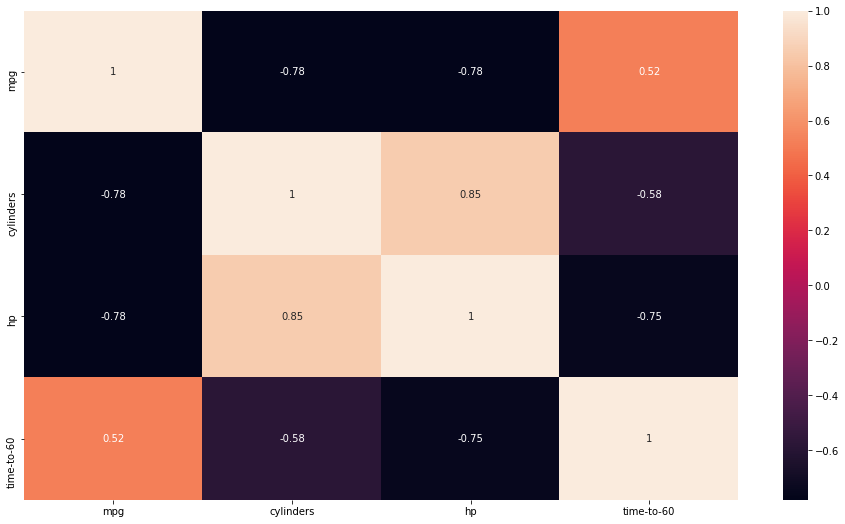

In [19]:
#encontrando a matriz de correlação entre alguns dados
plt.rcParams["figure.figsize"] = [16, 9]
matriz_correlacao=df_carros[['mpg','cylinders','hp','time-to-60']].corr()
sns.heatmap(matriz_correlacao, annot=True)  #realiza o plot da matriz de correlação
plt.show()

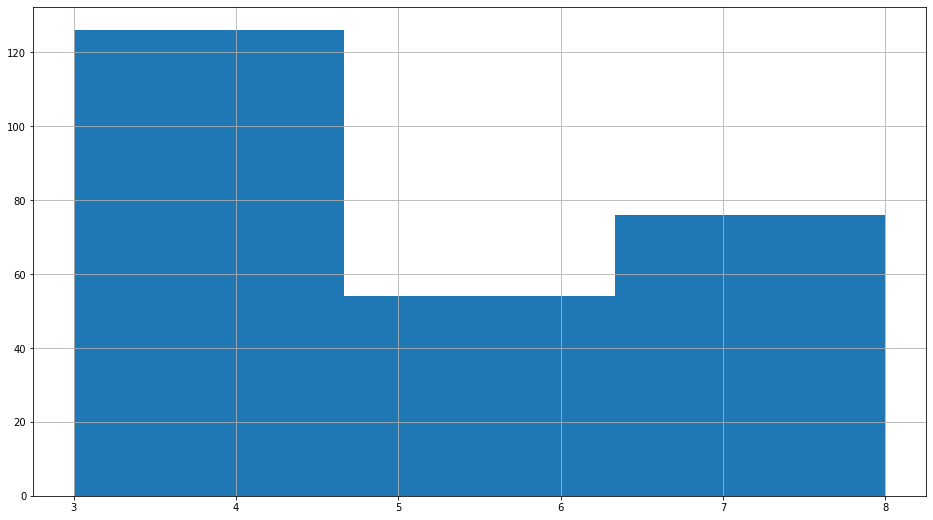

In [20]:
#plotando alguns gráficos
df_carros['cylinders'].hist(bins=3);  #histograma

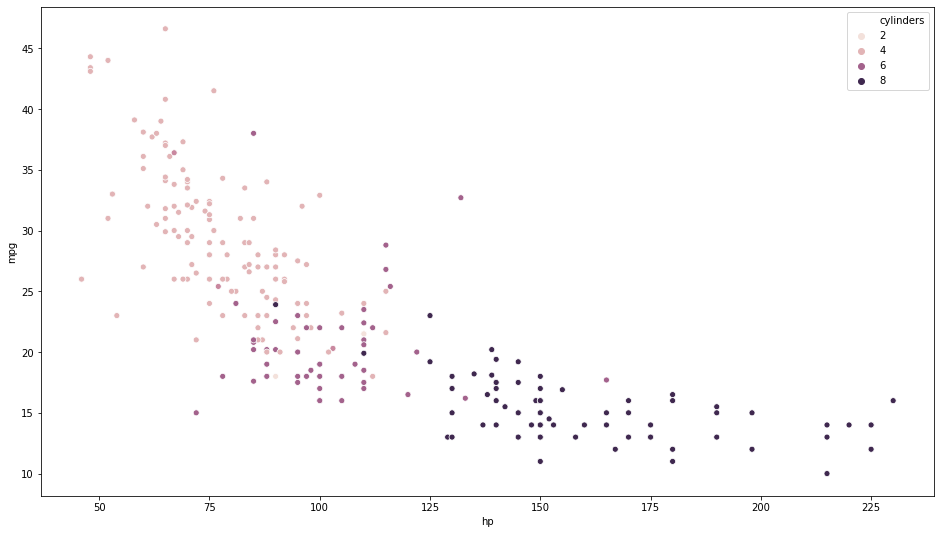

In [21]:
#plotando o scatterplot
cmap = sns.cubehelix_palette(dark=.2, light=.9, as_cmap=True) #definindo as cores para serem utilizadas
sns.scatterplot(x="hp", y="mpg", hue="cylinders", data=df_carros, palette=cmap); # realizando o plot do gráfico

**Identificando possíveis outliers**

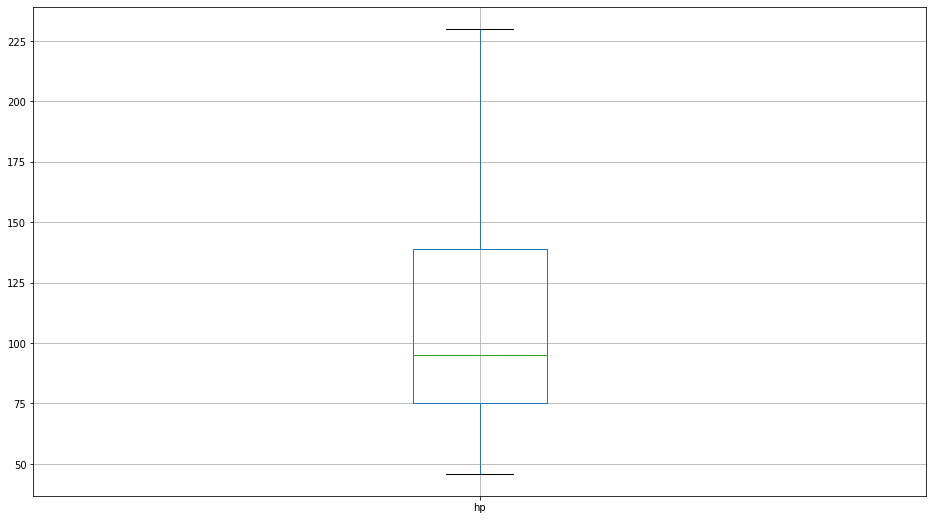

In [22]:
#realizando o plot do boxplot
df_carros[['hp']].boxplot()

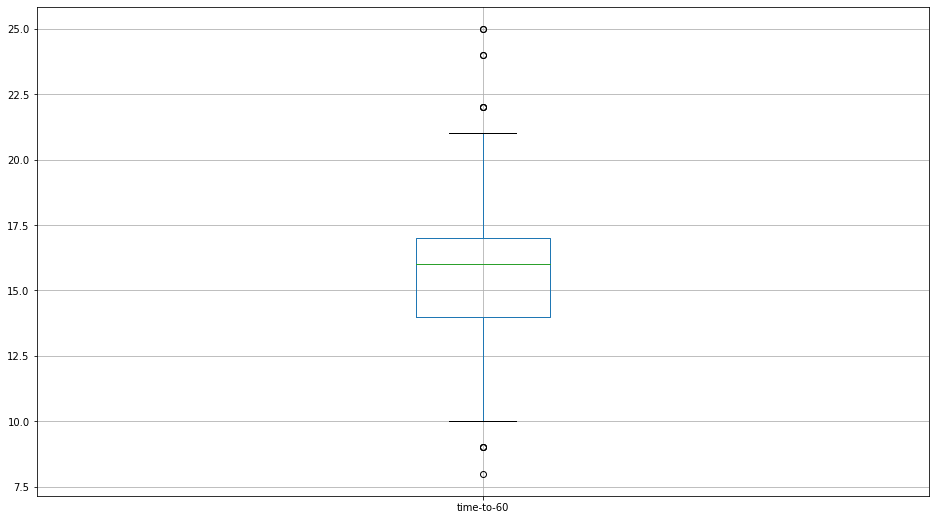

In [23]:
df_carros[['time-to-60']].boxplot()

**Inicalizando o PCA**

In [25]:
#Normalização com média 0 e desvio 1
normaliza = StandardScaler() #objeto para a normalização
X_std=normaliza.fit_transform(df_carros) #aplica a normalização

In [26]:
X_std

array([[-1.16955986,  1.38259161,  1.35928352, ...,  1.40830944,
        -1.20581953, -1.33062399],
       [ 1.10918971, -0.91201748, -1.02737459, ..., -1.26647849,
        -0.51600992,  0.87416398],
       [-0.78764653,  1.38259161,  0.92035789, ...,  0.51827493,
        -1.55072433, -1.60622249],
       ...,
       [-0.1511243 ,  0.23528707,  0.28025802, ..., -0.20077927,
        -0.17110512,  1.70095947],
       [-0.66034208,  0.23528707,  0.28025802, ...,  0.32972814,
         0.17379969, -1.33062399],
       [-0.1511243 ,  0.23528707,  0.44485513, ...,  0.40584952,
        -0.17110512,  0.04736849]])

In [28]:
#inicalizando o objeto PCA
pca = PCA(n_components=7)  #instancia o objeto
principalComponents = pca.fit_transform(X_std) #aplica a identificação do pca

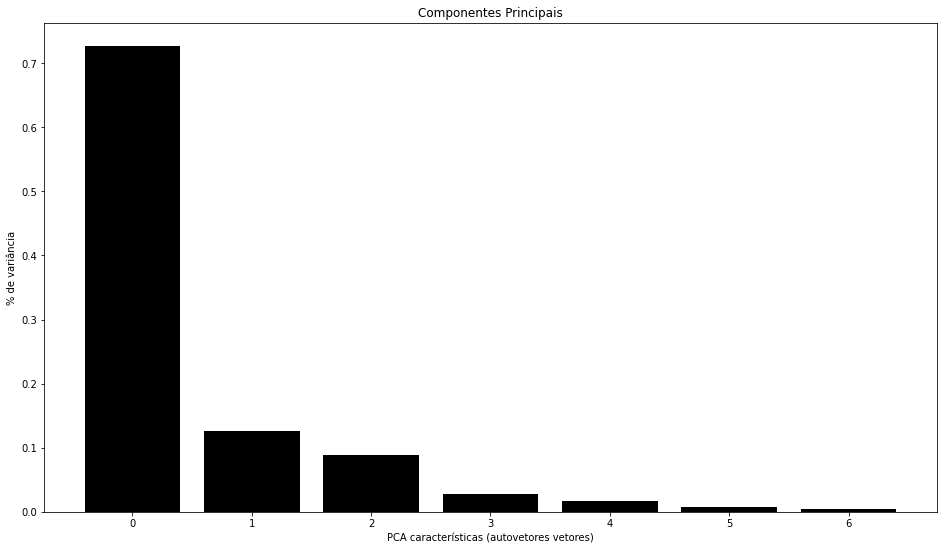

In [29]:
#plot das componentes principais
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black');
plt.xlabel('PCA características (autovetores vetores)')
plt.ylabel('% de variância')
plt.title("Componentes Principais")
plt.xticks(features);

Text(0.5, 1.0, 'Componentes Principais - Acumulada')

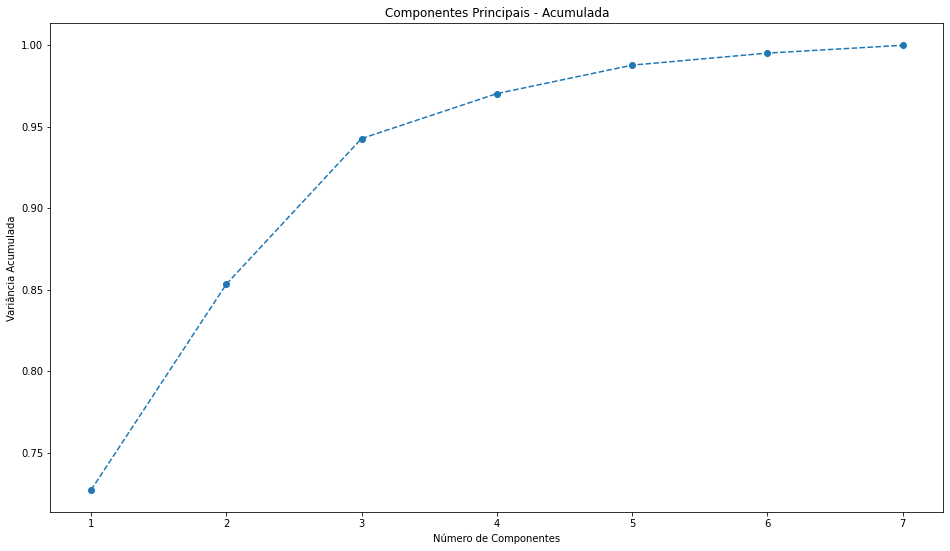

In [30]:

#plot cumulativo das variâncias explicadas
pca.explained_variance_ratio_

plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--') #plot dos valores acumulados para os dados
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title("Componentes Principais - Acumulada")

In [31]:
#criando o dataset com as componentes
PCA_components = pd.DataFrame(principalComponents)

In [32]:
PCA_components.head(10)

,0,1,2,3,4,5,6
0,3.462364,0.521006,-0.126173,0.256198,0.081114,-0.179353,-0.096898
1,-2.169734,-0.289448,-1.283082,-0.086480,-0.287733,-0.030423,0.015327
2,2.670404,1.037925,-0.721314,0.510539,-0.529940,-0.062964,-0.163207
3,3.514979,0.837653,-0.787981,0.517371,-0.429775,-0.186952,0.467418
4,-2.293086,0.199693,-0.199599,0.081984,-0.175801,0.005917,0.069508
5,1.423201,-1.578994,0.991427,0.714038,-0.197613,0.084843,0.176480
6,3.288916,0.008542,0.255324,0.018004,0.012136,-0.203194,-0.065238
7,4.766886,0.517902,-1.101200,0.488425,0.741767,0.081763,0.281947
8,-1.061240,-0.868275,1.477076,-0.108841,0.194492,-0.446807,0.050987
9,-2.941313,-0.972843,-0.521614,0.442657,-0.032815,-0.079485,-0.009475


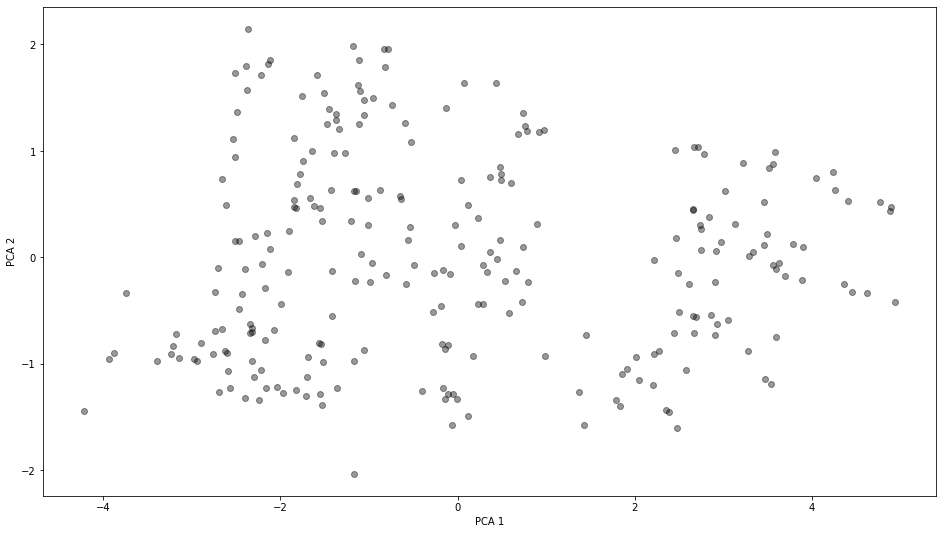

In [33]:
#realizando o plot em duas dimensões (componentes 1 e 2 )
plt.scatter(PCA_components[0], PCA_components[1], alpha=.4, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');

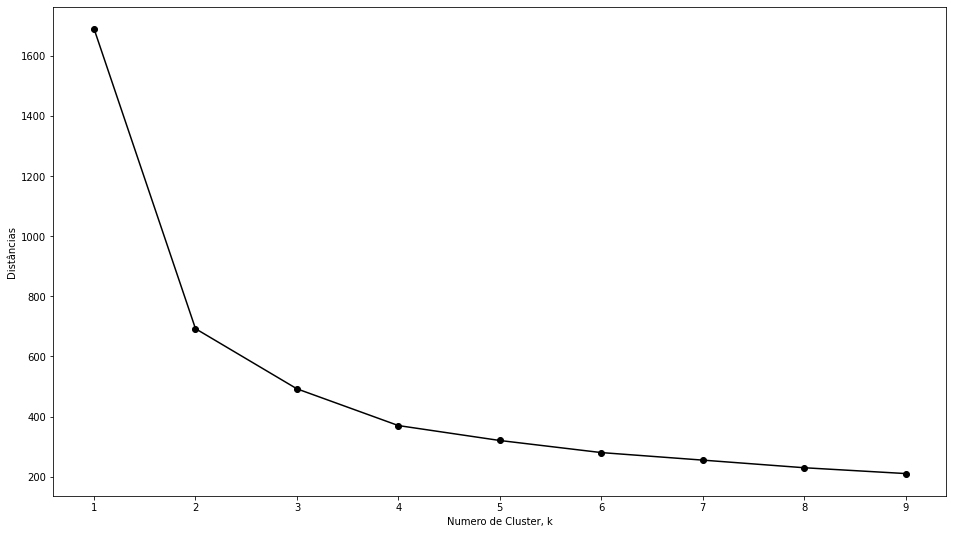

In [34]:
#aplicando o curva do cootovelo para encontrar o número de clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Cria o obeto para modelo kmens para os testes
    model = KMeans(n_clusters=k)
    
    # Aplica nas componentes selecionadas (3 componentes)
    model.fit(PCA_components.iloc[:,:3])
    
    # Adiciona os valores para a distância (agitação)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('Numero de Cluster, k')
plt.ylabel('Distâncias')
plt.xticks(ks)
plt.show()

In [35]:
#---------------------------------------------------------------------------
# implementando o K-means com 3 clusters 
#---------------------------------------------------------------------------
k_means_pca=KMeans(n_clusters=3)
k_means_pca.fit(PCA_components.iloc[:,:3])


#df com os dados iniciais e de cada uma das componentes
df_segment_pca_kmeans=pd.concat([df_carros.reset_index(drop=True),PCA_components.iloc[:,:3]],axis=1)
df_segment_pca_kmeans.columns.values[-3:]=['Componente 1','Componente 2','Componente 3']
df_segment_pca_kmeans['Seguimento no Kmeans']=k_means_pca.labels_


df_segment_pca_kmeans.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,Componente 1,Componente 2,Componente 3,Seguimento no Kmeans
0,14.0,8,350.0,165,4209.0,12,1972,3.462364,0.521006,-0.126173,2
1,31.9,4,89.0,71,1925.0,14,1980,-2.169734,-0.289448,-1.283082,1
2,17.0,8,302.0,140,3449.0,11,1971,2.670404,1.037925,-0.721314,2
3,15.0,8,400.0,150,3761.0,10,1971,3.514979,0.837653,-0.787981,2
4,30.5,4,98.0,63,2051.0,17,1978,-2.293086,0.199693,-0.199599,1


In [36]:
#adicionando um dicionário para cada um dos seguimentos
df_segment_pca_kmeans['Cluster']=df_segment_pca_kmeans['Seguimento no Kmeans'].map({0:'C1',
                     1:'C2',
                     2:'C3'})


In [37]:
df_segment_pca_kmeans.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,Componente 1,Componente 2,Componente 3,Seguimento no Kmeans,Cluster
0,14.0,8,350.0,165,4209.0,12,1972,3.462364,0.521006,-0.126173,2,C3
1,31.9,4,89.0,71,1925.0,14,1980,-2.169734,-0.289448,-1.283082,1,C2
2,17.0,8,302.0,140,3449.0,11,1971,2.670404,1.037925,-0.721314,2,C3
3,15.0,8,400.0,150,3761.0,10,1971,3.514979,0.837653,-0.787981,2,C3
4,30.5,4,98.0,63,2051.0,17,1978,-2.293086,0.199693,-0.199599,1,C2


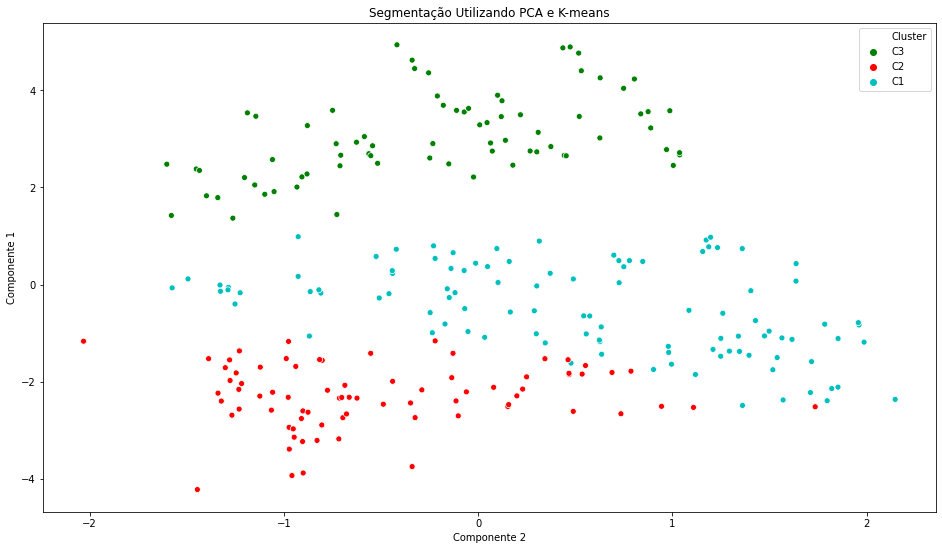

In [38]:
#plotando os resultados
x_axis=df_segment_pca_kmeans['Componente 2']
y_axis=df_segment_pca_kmeans['Componente 1']
sns.scatterplot(x_axis,y_axis,hue=df_segment_pca_kmeans['Cluster'],palette=['g','r','c'])
plt.title('Segmentação Utilizando PCA e K-means')
plt.show()

**Árvore de Decisão**

In [39]:
#importando as bibliotecas
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação

In [40]:
#preparando o dataset
df_carros_arvore=pd.read_csv('cars.csv')

In [41]:
#transformando os dados para numéricos
df_carros_arvore['cubicinches']=pd.to_numeric(df_carros_arvore['cubicinches'], errors='coerce')
df_carros_arvore['weightlbs']=pd.to_numeric(df_carros_arvore['weightlbs'], errors='coerce')

In [42]:
#retirando os valores nulos
df_carros_arvore.dropna(inplace=True)

In [43]:
#mostrando o dataset
df_carros_arvore.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [45]:
#adicionando a coluna de classificação
df_carros_arvore['is_efficient']=df_carros_arvore['mpg'].map(lambda x: 1 if x>25 else 0)

In [46]:
df_carros_arvore.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,is_efficient
0,14.0,8,350.0,165,4209.0,12,1972,US.,0
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,1
2,17.0,8,302.0,140,3449.0,11,1971,US.,0
3,15.0,8,400.0,150,3761.0,10,1971,US.,0
4,30.5,4,98.0,63,2051.0,17,1978,US.,1


In [47]:
df_carros_arvore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 260
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           256 non-null    float64
 1   cylinders     256 non-null    int64  
 2   cubicinches   256 non-null    float64
 3   hp            256 non-null    int64  
 4   weightlbs     256 non-null    float64
 5   time-to-60    256 non-null    int64  
 6   year          256 non-null    int64  
 7   brand         256 non-null    object 
 8   is_efficient  256 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 20.0+ KB


In [48]:
#definindo as entradas e as saídas
entradas_arvore=df_carros_arvore[['cylinders'	,'cubicinches'	,'hp'	,'weightlbs'	,'time-to-60']]
saidas_arvore=df_carros_arvore['is_efficient']

In [49]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(entradas_arvore, saidas_arvore, test_size=0.30)# divide 20% para teste

In [50]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

In [51]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  8]
 [ 7 29]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.78      0.81      0.79        36

    accuracy                           0.81        77
   macro avg       0.80      0.81      0.80        77
weighted avg       0.81      0.81      0.81        77



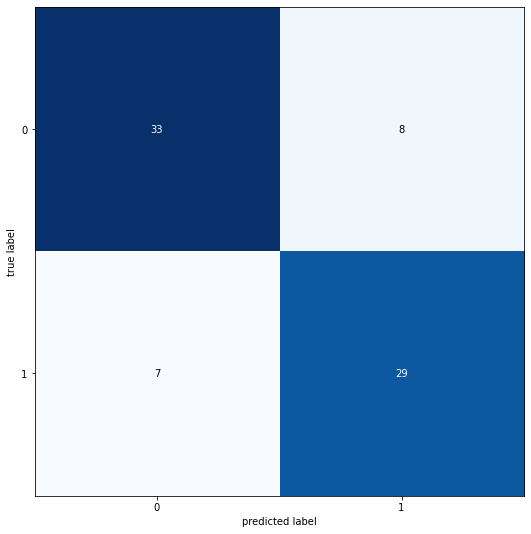

In [52]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()